In [180]:
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F

from c_PatchDataset import PatchDataset
import matplotlib.pyplot as plt
import os
import numpy as np

In [181]:
batch_size = 16

data_dir = 'C:/Users/david/MT_code/data/extracted_patches/mutants_tensors'
labels_file = 'C:/Users/david/MT_code/data/fitness_dict_1500.npy'

In [182]:
data_transforms = transforms.Compose(
    [transforms.ToTensor(),
     transforms.ConvertImageDtype(torch.double)])

#label_transforms = transforms.Compose(
#    [transforms.ToTensor(),
#     transforms.ConvertImageDtype(torch.double)])

In [183]:
dataset = PatchDataset(labels_file = labels_file, data_dir = data_dir, 
                        transform = data_transforms)#, target_transform=label_transforms)

In [184]:
trainset, testset, valset = torch.utils.data.random_split(dataset, [1000, 250, 250])

In [185]:
trainloader = DataLoader(dataset = trainset, batch_size= batch_size, shuffle = True)
testloader = DataLoader(dataset = testset, batch_size= batch_size, shuffle = True)

In [186]:
# A linear model
model = nn.Linear(16*72*10, 1) # Notice different order then Keras!!
model.double()
# Let's verify that the shapes of the weights and biases are what we expect
weight, bias = list(model.parameters()) 
print(weight.shape)
print(bias.shape)

torch.Size([1, 11520])
torch.Size([1])


In [187]:
num_epochs = 500
learning_rate = 0.0001

criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)#, momentum=0.9)

### Training the model: 

In [188]:
# Putting it all together. . .
def run_gradient_descent(model, batch_size=batch_size, learning_rate=learning_rate, weight_decay=0, num_epochs=10):
    criterion = nn.MSELoss(reduction='mean')
    optimizer = optim.SGD(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
    
    iters, losses = [], []
    #iters_sub, train_acc, val_acc = [], [] ,[]


    # training
    n = 0 # the number of iterations 
    for epoch in range(num_epochs):
        for xs, ts in iter(trainloader):
            #print(xs.shape)
            if len(ts) != batch_size: continue

            #xs = xs.view(-1, 784) # flatten the image. The -1 is a wildcard
            xs = torch.flatten(xs, start_dim = 1) #flatten all dimensions except the batch
            #print(xs.shape)
            zs = model(xs)
            zs = zs.view(batch_size)
            #print(zs.shape)
            #print(ts.shape)
            
            loss = criterion(zs, ts) # compute the total loss
            #print(loss)
            loss.backward() 
            optimizer.step() 
            optimizer.zero_grad()

            print(f'epoch {epoch + 1}, loss {loss:f}')

            # save the current training information
            iters.append(n)
            losses.append(float(loss)/batch_size) # compute *average* loss

            #if n % 10 == 0:

            #    iters_sub.append(n) 
            #    train_acc.append(get_accuracy(model, trainset)) 
            #    val_acc.append(get_accuracy(model, valset))
                
            # increment the iteration number 
            n += 1
            
    # plotting
    plt.title("Training Curve (batch_size={}, lr={})".format(batch_size, learning_rate)) 
    plt.plot(iters, losses, label="Train")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.show()
    
    #plt.title("Training Curve (batch_size={}, lr={})".format(batch_size, learning_rate)) 
    #plt.plot(iters_sub, train_acc, label="Train")
    #plt.plot(iters_sub, val_acc, label="Validation")
    #plt.xlabel("Iterations")
    #plt.ylabel("Accuracy") 
    #plt.legend(loc='best') 
    #plt.show()
    
    return model

def get_accuracy(model, data):
    loader = DataLoader(data, batch_size=250)
    correct, total = 0, 0 
    for xs, ts in loader:
        xs = torch.flatten(xs, start_dim = 1) #flatten all dimensions except the batch
        zs = model(xs)
        pred = zs.max(1, keepdim=True)[1] # get the index of the max logit 
        correct += pred.eq(ts.view_as(pred)).sum().item()
        total += int(ts.shape[0])
    return correct / total

epoch 1, loss 4.219768
epoch 1, loss 3.472244
epoch 1, loss 1.624981
epoch 1, loss 6.099012
epoch 1, loss 2.105074
epoch 1, loss 2.533902
epoch 1, loss 0.457480
epoch 1, loss 0.867503
epoch 1, loss 0.504271
epoch 1, loss 1.399164
epoch 1, loss 0.582794
epoch 1, loss 1.627683
epoch 1, loss 0.920228
epoch 1, loss 0.970850
epoch 1, loss 1.757895
epoch 1, loss 0.472261
epoch 1, loss 1.426700
epoch 1, loss 0.687761
epoch 1, loss 0.861125
epoch 1, loss 0.825970
epoch 1, loss 1.447060
epoch 1, loss 0.598104
epoch 1, loss 2.567999
epoch 1, loss 0.606081
epoch 1, loss 0.599232
epoch 1, loss 0.697482
epoch 1, loss 1.514949
epoch 1, loss 0.847097
epoch 1, loss 3.922540
epoch 1, loss 0.568689
epoch 1, loss 1.527758
epoch 1, loss 1.121949
epoch 1, loss 0.812409
epoch 1, loss 2.338374
epoch 1, loss 0.706842
epoch 1, loss 0.785309
epoch 1, loss 0.493126
epoch 1, loss 1.264852
epoch 1, loss 0.479841
epoch 1, loss 2.931822
epoch 1, loss 0.957267
epoch 1, loss 0.999810
epoch 1, loss 2.102999
epoch 1, lo

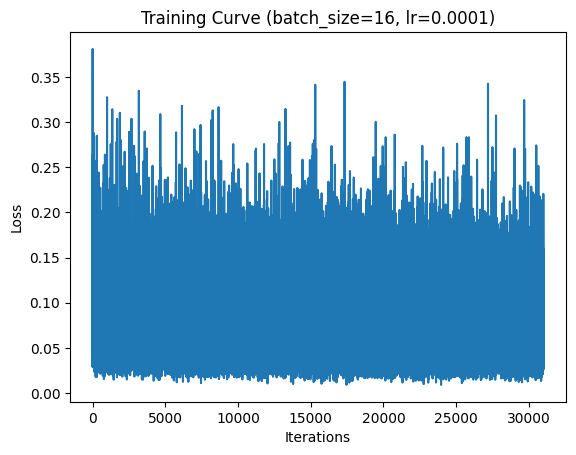

Linear(in_features=11520, out_features=1, bias=True)

In [189]:
# Let’s try training this model!
run_gradient_descent(model, batch_size=batch_size, learning_rate=learning_rate, num_epochs=num_epochs)